# Prepping Data Week 3

For the third week of beginner month, we're going to be building on the skills that we've already learnt, as well as exploring new concepts. This week may feel a little more challenging, but I promise you're ready for it!

Data Source Bank has some quarterly targets for the value of transactions that are being performed in-person and online. It's our job to compare the transactions to these target figures.

### Inputs 
Same as Week 1
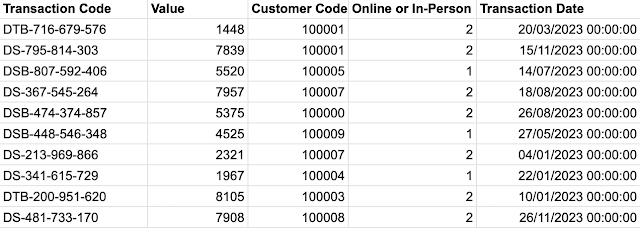

### Requirements
1. Input the data
2. For the transactions file:
- Filter the transactions to just look at DSB (help)
These will be transactions that contain DSB in the Transaction Code field
- Rename the values in the Online or In-person field, Online of the 1 values and In-Person for the 2 values
- Change the date to be the quarter (help)
- Sum the transaction values for each quarter and for each Type of Transaction (Online or In-Person) (help)
3. For the targets file:
- Pivot the quarterly targets so we have a row for each Type of Transaction and each Quarter (help)
 Rename the fields
- Remove the 'Q' from the quarter field and make the data type numeric (help)
- Join the two datasets together (help)
You may need more than one join clause!
- Remove unnecessary fields
- Calculate the Variance to Target for each row (help)

### Output the data
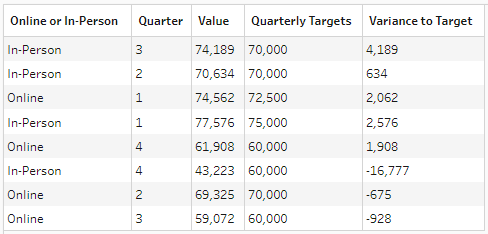

5 fields
- Online or In-Person
- Quarter
- Value
- Quarterly Targets
- Variance to Target
- 8 rows (9 including headers)

In [87]:
import numpy as np
import pandas as pd
import os

In [88]:
os.listdir()

['PD 2023 Wk 1 Input.csv', 'Targets.csv', 'Week 3.ipynb']

In [89]:
# Read in Transactions data

# Parse date with (DD/MM/YYYY format)while reading in CSV file will not   
# give the correct result when we extract the datepart later
#
# df = pd.read_csv("PD 2023 Wk 1 Input.csv", parse_dates=[4]) 

df = pd.read_csv("PD 2023 Wk 1 Input.csv")

In [90]:
df.head(10)

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00
5,DSB-448-546-348,4525,100009,1,27/05/2023 00:00:00
6,DS-213-969-866,2321,100007,2,04/01/2023 00:00:00
7,DS-341-615-729,1967,100004,1,22/01/2023 00:00:00
8,DTB-200-951-620,8105,100003,2,10/01/2023 00:00:00
9,DS-481-733-170,7908,100008,2,26/11/2023 00:00:00


In [91]:
# Convert 'Transaction Date' to datetime format.
# Need to be explicit about how to parse the current datetime format
# Else aggregation by Quarter will be off.
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format="%d/%m/%Y %H:%M:%S")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction Code     365 non-null    object        
 1   Value                365 non-null    int64         
 2   Customer Code        365 non-null    int64         
 3   Online or In-Person  365 non-null    int64         
 4   Transaction Date     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 14.4+ KB


In [93]:
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,2023-03-20
1,DS-795-814-303,7839,100001,2,2023-11-15
2,DSB-807-592-406,5520,100005,1,2023-07-14
3,DS-367-545-264,7957,100007,2,2023-08-18
4,DSB-474-374-857,5375,100000,2,2023-08-26


In [94]:
# Filter the transactions to just look at DSB
df['Bank'] =[x.split('-')[0] for x in df['Transaction Code']]

In [95]:
df = df[df['Bank'] == "DSB"]

In [96]:
# Rename the values in the Online or In-person field to 1 = Online and 2 = In-Person respectively.
df['Online or In-Person'].replace({1:"Online", 2:"In-Person"}, inplace=True)

In [97]:
df['Quarter'] = df['Transaction Date'].dt.quarter

In [98]:
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank,Quarter
2,DSB-807-592-406,5520,100005,Online,2023-07-14,DSB,3
4,DSB-474-374-857,5375,100000,In-Person,2023-08-26,DSB,3
5,DSB-448-546-348,4525,100009,Online,2023-05-27,DSB,2
11,DSB-422-218-322,118,100010,Online,2023-05-12,DSB,2
12,DSB-669-227-170,830,100001,Online,2023-04-15,DSB,2


In [99]:
# Sum the transaction values for each quarter and for each Type of Transaction
# (Online or In-Person) (help)

results = df.groupby(['Online or In-Person', 'Quarter'])['Value'].sum().reset_index()

In [100]:
results

,Online or In-Person,Quarter,Value
0,In-Person,1,77576
1,In-Person,2,70634
2,In-Person,3,74189
3,In-Person,4,43223
4,Online,1,74562
5,Online,2,69325
6,Online,3,59072
7,Online,4,61908



3. For the targets file:
- Pivot the quarterly targets so we have a row for each Type of Transaction and each Quarter (help)
 Rename the fields
- Remove the 'Q' from the quarter field and make the data type numeric (help)
- Join the two datasets together (help)
You may need more than one join clause!
- Remove unnecessary fields
- Calculate the Variance to Target for each row (help)

In [101]:
targets = pd.read_csv("Targets.csv")

In [102]:
targets.head()

,Online or In-Person,Q1,Q2,Q3,Q4
0,Online,72500,70000,60000,60000
1,In-Person,75000,70000,70000,60000


In [103]:
list(targets.columns[1:])

['Q1', 'Q2', 'Q3', 'Q4']

In [104]:
# Unpivot from wide to tall
targets = pd.melt(targets, id_vars = 'Online or In-Person', value_vars=list(targets.columns[1:]))

In [105]:
targets

,Online or In-Person,variable,value
0,Online,Q1,72500
1,In-Person,Q1,75000
2,Online,Q2,70000
3,In-Person,Q2,70000
4,Online,Q3,60000
5,In-Person,Q3,70000
6,Online,Q4,60000
7,In-Person,Q4,60000


In [106]:
# Rename columns
targets.rename(columns = {'variable': 'Quarter', 'value':'Quarterly Target'}, inplace = True)

In [107]:
targets

,Online or In-Person,Quarter,Quarterly Target
0,Online,Q1,72500
1,In-Person,Q1,75000
2,Online,Q2,70000
3,In-Person,Q2,70000
4,Online,Q3,60000
5,In-Person,Q3,70000
6,Online,Q4,60000
7,In-Person,Q4,60000


In [108]:
targets['Quarter'] = [ x[1:] for x in targets['Quarter']]

In [109]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Online or In-Person  8 non-null      object
 1   Quarter              8 non-null      object
 2   Quarterly Target     8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [110]:
targets['Quarter'] =targets['Quarter'].astype ('Int64') 

In [111]:
# Join the two data sets together
merged = pd.merge(results, targets, on =['Online or In-Person', 'Quarter'])

In [112]:
# Aggregated Values are very different from Power QUery or Tableau! 
# Total sum is corrent.

merged

,Online or In-Person,Quarter,Value,Quarterly Target
0,In-Person,1,77576,75000
1,In-Person,2,70634,70000
2,In-Person,3,74189,70000
3,In-Person,4,43223,60000
4,Online,1,74562,72500
5,Online,2,69325,70000
6,Online,3,59072,60000
7,Online,4,61908,60000


In [113]:
merged['Variance to Target']= merged['Value'] - merged ['Quarterly Target']

In [114]:
merged

,Online or In-Person,Quarter,Value,Quarterly Target,Variance to Target
0,In-Person,1,77576,75000,2576
1,In-Person,2,70634,70000,634
2,In-Person,3,74189,70000,4189
3,In-Person,4,43223,60000,-16777
4,Online,1,74562,72500,2062
5,Online,2,69325,70000,-675
6,Online,3,59072,60000,-928
7,Online,4,61908,60000,1908


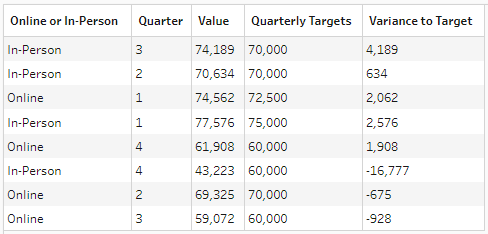